This file contains the first experiment of the paper, where we illustrate that a significant reduction of the storage is possible with little loss of performance with the LB-SDA-LM algorithm we propose.

In [1]:
import arms
import numpy as np
import matplotlib.pyplot as plt
from tracker import Tracker2, SWTracker, DiscountTracker, TrackerLM
from MAB import GenericMAB as GMAB
%matplotlib inline  
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%load_ext autoreload
%load_ext memory_profiler
%autoreload 2
from utils import plot_mean_arms, traj_arms
marker_list = ["o","v","*","s"]
color_list = ['blue','red','orange', 'c', 'm', 'green']

# Experience in stationary environment with Bernoulli distribution

In [2]:
arm_start, param_start = ['B', 'B'], [0.05, 0.15]
chg_dist = {}

mab = GMAB(arm_start, param_start, chg_dist)
T = 10000

In [5]:
N = 2000

def mem(r):
    return np.log(r)**2 + 50

reg_LBSA = mab.MC_regret('LB_SDA_baseline', N, T, {}, store_step=1)
reg_SWTS = mab.MC_regret('SW_TS', N, T, {'tau': int(T)}, store_step=1)
reg_SWUCB = mab.MC_regret('SW_UCB', N, T, {'C': 1/np.sqrt(2), 'tau': int(T)}, store_step=1)
reg_KLUCB = mab.MC_regret('klUCB', N, T, {}, store_step=1)
reg_LBSA_LM_f8 = mab.MC_regret('LB_SDA_LM', N, T, {'memory_func': mem}, store_step=1)

Computing 2000 simulations: 100%|██████████| 2000/2000 [19:24<00:00,  1.72it/s]


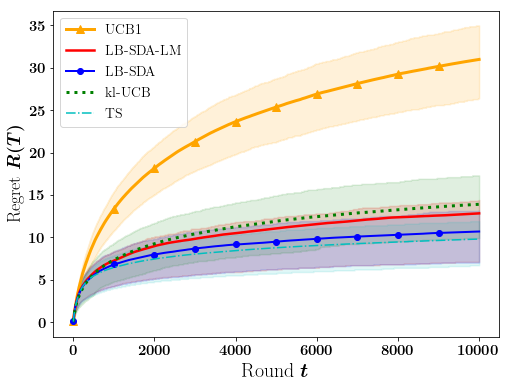

In [8]:
import matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc("lines", linewidth=3)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('font', weight='bold')
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath} \boldmath"]


t_saved = [i for i in range(T)]

plt.figure(figsize=(8,6))





# UCB
plt.plot(reg_SWUCB[0], color = "orange", marker = "^", markevery = 1000, markersize = 8, label = 'UCB1')
plt.fill_between(t_saved, np.quantile(reg_SWUCB[1], q= 0.25, axis=1), np.quantile(reg_SWUCB[1], q= 0.75, axis=1), 
                 alpha=0.15, linewidth=1.5, color="orange")


# Memory Limited LB-SDA
plt.plot(reg_LBSA_LM_f8[0],color = "red",  linewidth=2.5,label= "LB-SDA-LM")
plt.fill_between(t_saved, np.quantile(reg_LBSA_LM_f8[1], q= 0.25, axis=1), 
                 np.quantile(reg_LBSA_LM_f8[1], q= 0.75, axis=1), 
                 alpha=0.15, linewidth=1.5, color='red')

# LB-SDA 
plt.plot(reg_LBSA[0], color = "blue",  linewidth=2, linestyle = "-", marker="o", markevery = 1000,label= "LB-SDA")
plt.fill_between(t_saved, np.quantile(reg_LBSA[1], q= 0.25, axis=1), 
                 np.quantile(reg_LBSA[1], q= 0.75, axis=1), 
                 alpha=0.12, linewidth=1.5, color="blue")

#KL-UCB
plt.plot(reg_KLUCB[0], label = 'kl-UCB', linestyle= "dotted", color = "green")
plt.fill_between(t_saved, np.quantile(reg_KLUCB[1], q= 0.25, axis=1), np.quantile(reg_KLUCB[1], q= 0.75, axis=1), 
                 alpha=0.12, linewidth=1.5, color = "green")

# TS
plt.plot(reg_SWTS[0], color = "c", linestyle = "-.", linewidth = 1.5, label= "TS")
#marker = 's', markevery= 1000, label= "TS")
plt.fill_between(t_saved, np.quantile(reg_SWTS[1], q= 0.25, axis=1), 
                 np.quantile(reg_SWTS[1], q= 0.75, axis=1), 
                 alpha=0.12, linewidth=1.5, color="c")

plt.legend(loc=2, fontsize=14).draw_frame(True)
plt.xlabel(r'Round $\boldsymbol{t}$', fontsize=20)
plt.ylabel(r'Regret $\boldsymbol{R(T)}$', fontsize=18)


plt.savefig('final_stationary.png', dpi = 200, bbox_inches='tight')